## H Dip in Data Analytics: Elizabeth Daly
***
### 46887 Computational Thinking with Algorithms
### Benchmarking Sorting Algorithms
***

## Introduction

This Jupyter notebook contains the code to implement, test, and benchmark each of the sorting algorithms I have chosen to study for the project. It also contains graphs and tables of results. The project report is a separate pdf document produced using LaTeX. A very brief explanation of how each algorithm works is included here; the project report contains a detailed explanation with example input instances.
***

### Preliminaries

Load the various packages required to complete the work and set up the matplotlib plotting environment.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from random import randint
import csv
import pandas as pd
#import seaborn as sns

## 1. Insertion Sort (a simple comparison-based sort)
***
Briefly, insertion sort works on a list of length n via an iterative process. 
- The list to be sorted is split into a sorted part and an unsorted part.
- On the first iteration the sorted part is assumed to be the first element in the list.
- A key element is defined: on iteration one the key is the second element in the list.
- The key value is compared to the sorted portion of the list.
- Any element in the sorted part of the list which is greater than the key is moved to the right by one position.
- The key is placed in the correct position in the sorted part of the list.
- On iteration two, elements one and two are assumed to be sorted. The key value is element three.
- Continue working through the list, defining a new key value on each iteration and comparing it to each element to its left in the sorted part of the list.

## insertion_sort

In [2]:
# Define an insertion sort function which operates on a list a
# Code adapted from: https://www.pythoncentral.io/insertion-sort-implementation-guide/
# and: https://tutorialedge.net/compsci/sorting/insertion-sort-in-python/

def insertion_sort(a):
    # Iterate through each element of a, starting at the second element (index = 1).
    for i in range(1,len(a)):    
        # Key element is element at position i (first iteration key is at index=1).
        key = a[i]
        # Define a counter to check elements to the left of the key.
        position = i
        #print("i= ", i)
        # Set up a loop to compare the current key with the elements to its left i.e. the sorted portion of the list.
        while position > 0 and a[position - 1] > key:
            # Move elements one position to the right.
            a[position] = a[position - 1]
            # Decrement position counter.
            position -= 1
            # Insert the key value in its new position.
            a[position] = key
        #print("position= ", position, "key= ", key, ": ", a)
    # Return the sorted list in-place of unsorted input list.
    return a

In [3]:
# Perform a simple test of insertion_sort on a small list.
a = [7, 5, 2, 3, -2, 1]
print("Unsorted list:", a)
print("Sorted list:", insertion_sort(a))

Unsorted list: [7, 5, 2, 3, -2, 1]
Sorted list: [-2, 1, 2, 3, 5, 7]


## 2. Merge Sort (an efficient comparison-based sort)
***
Briefly, merge sort works in a recursive fashion as follows:
- An unsorted list containing n elements is recursively broken down into n lists each containing one element.
- Each of these single element lists is a base case in the recursion and is considered to be sorted.
- The sublists are repeatedly merged to create longer sorted lists until only a single sorted lists remains.
- Each merge step involves comparisons so that every element is placed into the merged list at the correct position.

## merge_sort

In [4]:
# Define a merge sort function which operates on a list a
# Code adapted from https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-8.php

def merge_sort(nlist):
    # Divide the list to be sorted into two smaller ones of roughly equal sizes.
    # Do this if the list length is > 1.
    if len(nlist) > 1:
        # Determine the midpoint of the list for splitting.
        mid = len(nlist) // 2
        # Left list is up to (but not including) midpoint.
        lefthalf = nlist[:mid]
        # Right half is from midpoint to end.
        righthalf = nlist[mid:]

        # Recursively apply the function on each half of the list.
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        # Counter to move through left, right and merged sublists.
        i = j = k = 0
        
        # Comparison steps during merge to ensure correct order of elements after merging.
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                nlist[k] = lefthalf[i]
                i += 1
            else:
                nlist[k] = righthalf[j]
                j += 1
            k += 1

        while i < len(lefthalf):
            nlist[k] = lefthalf[i]
            i = i + 1
            k = k + 1

        while j < len(righthalf):
            nlist[k] = righthalf[j]
            j = j + 1
            k = k + 1
    #print("Merging ",nlist)
    
    # Return the sorted list in-place of unsorted input list.
    return nlist

In [5]:
# Perform a simple test of merge_sort on a small list.
a = [14, 46, 43, 27, -1, 57, 41, 45, 21, 70]
print("Unsorted list:", a)
print("Sorted list:", merge_sort(a))

Unsorted list: [14, 46, 43, 27, -1, 57, 41, 45, 21, 70]
Sorted list: [-1, 14, 21, 27, 41, 43, 45, 46, 57, 70]


## 3. Counting Sort (a non-comparison sort)
***
Counting sort works by counting the number of elements that have distinct key values and then manipulating these counts to determine the position of each key in the output:
- Determine the key values k from the range of the input data (size n). In practice it's the maximum that is used.
- Initialize a count array of length (k+1) containing all zeros. This will store the count of key values.
- Initialize a result array of length n to store the sorted output (so it's not an in-place algorithm).
- Iterate through the input array, storing the number of times each key value occurs.
- Place elements into the sorted result array using the number of occurances of each key value stored in count array - the detail of this step is explained in the report.

## counting_sort

In [6]:
# Code adapted from: https://www.programiz.com/dsa/counting-sort
# Commented print statements are for checking code.
# Note that this implementation (a standard one for counting sort) will not sort negative numbers, demonstrating 
# one of the limitations of counting sort.

def counting_sort(array):
    size = len(array) # Length of array to be sorted.
    # print(size)
    # Empty array of same size to hold sorted values.
    output = [0] * size 
    
    # Max value in the array so that key range can ve determined.
    upper = max(array) 
    # print(lower, upper)
    
    # Create an empty count array of length (max value + 1).
    count = [0] * (upper + 1) 
    # print(count)

    # Store count of each element at it's index in count array.
    for i in range(0, size):
        count[array[i]] += 1
    # print(count) # Check count array.
    
    # Store cumulative sum of elements of the count array.
    for i in range(1, upper + 1):
        count[i] += count[i - 1]
    # print(count) # Check cumulative counts.

    # For each element in array, use that as an index into cumulative count array.
    # Place that element at index = (cum count value - 1) in output array.
    i = size - 1
    while i >= 0:
        output[count[array[i]] - 1] = array[i]
        count[array[i]] -= 1
        i -= 1

    for i in range(0, size):
        array[i] = output[i]
        
    # Return the new array containing the sorted elements (so not in-place).
    return output

In [7]:
## Perform a simple test of counting_sort on a small list.
## No negative numbers please counting_sort cannot handel them!
b = [6, 5, 3, 2, 1]
print("Unsorted list:", b)
print("Sorted list:", counting_sort(b))

Unsorted list: [6, 5, 3, 2, 1]
Sorted list: [1, 2, 3, 5, 6]


## 4. Quicksort (any other sorting algorithm)
***
A recursive algorith that works in the following way:
- Select one element in the array to be the pivot.
- Partition the array so that elements < the pivot are placed to its left, elements > the pivot to its right. 
- The pivot is now in its final position.
- Note that the full list has not been sorted, but it has been sorted in relation to the pivot element so that we don't have to compare elements in the left partition to those in the right partition.
- Recursively apply these two steps to each of the subarrays of elements < and > pivot.
- The base case for the recursion is an empty array or one of length 1, which is assumed sorted.

## quick_sort

In [8]:
# Code adapted from https://www.geeksforgeeks.org/python-program-for-quicksort/
# This code is contributed by Mohit Kumra 
# It takes the last element as the pivot.
# It places the pivot element at correct position in the sorted array.
# It places all smaller elements (smaller than pivot) to left of pivot and all greater elements to right of pivot.

def partition(arr, low, high):
    i = low - 1         # Index of smaller element 
    pivot = arr[high]     # pivot = last element in this implementation.
  
    for j in range(low , high): 
  
        # If current element is smaller than or equal to pivot 
        if   arr[j] <= pivot: 
          
            # increment index of smaller element.
            i = i + 1 
            arr[i], arr[j] = arr[j], arr[i] 
  
    arr[i+1], arr[high] = arr[high], arr[i+1] 
    return (i + 1) 
  
# The main function that implements quick_sort 
# arr = Array to be sorted, 
# low  = Starting index, 
# high = Ending index 
  
# Function to do quick_sort 
def quick_sort(arr, low, high):
    if low < high: 
  
        # pi is partition index, arr[p] is now at right place 
        pi = partition(arr, low, high) 
  
        # Separately sort elements before partition and after partition
        # Done by repeated recursive calls to quick_sort
        quick_sort(arr, low, pi-1) 
        quick_sort(arr, pi+1, high)
    
    # Return the sorted list in-place of unsorted input list.
    return arr

In [9]:
## Perform a simple test of quick_sort on a small list.
q = [6, 5, 30, 0, 2, -1]
print(len(q))
print("Unsorted list:", q)
print("Sorted list:", quick_sort(q, 0, len(q)-1))

6
Unsorted list: [6, 5, 30, 0, 2, -1]
Sorted list: [-1, 0, 2, 5, 6, 30]


## 5. Heapsort (any other sorting algorithm)
***
Heapsort works by transforming the elements of the input array into a heap structure. Tt takes advantage of this structure to easily access the maximum element in the heap and then place it in its correction position in the sorted list.
- The input to be sorted is rearranged into a list representation of a binary heap by using the list indices.
- Each index represents a node in the binary tree.
- The root is at index 0 with indices increasing towards the leaves. 
- There are rules which determine the child indices of each parent.
- The largest element in the heap (the root) is repeatedly removed and inserted into a sorted list.
- The heap is updated, following rules when removing elements from a heap in order to preserve its structure.

## heap_sort

In [10]:
# Code from: https://www.sanfoundry.com/python-program-implement-heapsort/

def heap_sort(alist):
    # Transform the input into a heap structure.
    build_max_heap(alist)
    
    for i in range(len(alist)-1, 0, -1):
        alist[0], alist[i] = alist[i], alist[0]
        # Turn this into a max heap, where each node has greater value than any of its children.
        max_heapify(alist, index = 0, size = i)
    # Return the sorted list in-place of unsorted input list.
    return alist

# Code to determine index of a parent node.
def parent(i):
    return (i - 1)//2
# Code to determine index of a left child node.
def left(i):
    return 2*i + 1
# Code to determine index of a right child node.
def right(i):
    return 2*i + 2
 
def build_max_heap(alist):
    length = len(alist)
    start = parent(length - 1)
    
    while start >= 0:
        max_heapify(alist, index = start, size = length)
        start = start - 1
        
def max_heapify(alist, index, size):
    
    l = left(index)
    r = right(index)
    
    # Finding the max element in the heap.
    if (l < size and alist[l] > alist[index]):
        largest = l
    else:
        largest = index
        
    if (r < size and alist[r] > alist[largest]):
        largest = r
        
    if (largest != index):
        # Swapping elements in the tree/list.
        alist[largest], alist[index] = alist[index], alist[largest]
        # Recursively apply the function to pairs of nodes to generate a max heap structure.
        max_heapify(alist, largest, size)
    #print(alist) # Check.
    return alist

In [11]:
## Perform a simple test of heap_sort on a small list.
h = [10, 17, 8, 9, 1, 5, -3]
print("Unsorted list:", h)
print("Sorted list:", heap_sort(h))

Unsorted list: [10, 17, 8, 9, 1, 5, -3]
Sorted list: [-3, 1, 5, 8, 9, 10, 17]


## Generate arrays containing random integers in a given range
***
- n is the size of the array
- It contains random integers in the range 0 to n inclusive

In [12]:
# Define a function to generate an array of size n containing integers in the range 0 to some max_n
def random_array(n):
    max_n = n  # Largest integer in random array. (smallest is 0).
    array = [] # Initialize to all zeros.
    # Generate n random integers in range (0 - max_n) inclusive.
    for i in range(0, n, 1):
        array.append(randint(0, max_n))
    return array

In [13]:
# Test it
n1 = random_array(10)
print(n1)

[3, 8, 6, 9, 9, 5, 3, 8, 1, 8]


## iPython magic function %timeit
***
- https://stackoverflow.com/questions/29280470/what-is-timeit-in-python

- %timeit is an ipython magic function, which can be used to time a particular piece of code (A single execution statement, or a single method).
- Might look into this later.

In [14]:
n = 100
ip = random_array(n)
# print(ip)
print("insertion sort")
%timeit insertion_sort(ip)

ip = random_array(n)
# print(ip)
print("merge sort")
#%timeit -r 10 -n 5 merge_sort(ip)
%timeit merge_sort(ip)

ip = random_array(n)
# print(ip)
print("counting sort")
%timeit counting_sort(ip)

ip = random_array(n)
# print(ip)
print("quick sort")
%timeit quick_sort(ip, 0, len(ip)-1)

ip = random_array(n)
# print(ip)
print("heap sort")
%timeit heap_sort(ip)

insertion sort
10.4 µs ± 18.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
merge sort
249 µs ± 60.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
counting sort
49.6 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
quick sort
898 µs ± 315 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
heap sort
571 µs ± 269 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Benchmarking - Test with a single algorithm first and one size of input array
***
- Measure the running time of each algorithm 10 times.
- Output the average of the 10 runs.
- Display the size of the input array.
- BE CAREFUL: For in-place algorithms, the unsorted array is what needs to be supplied as input to each iteration. 

In [15]:
# Use numpy randint to generate an array of random integers of size n, values from 0 to n-1
n = 10

# Test the sorting algorithm runs times
runs = 10
# Array to store results.
runtimes = []

# Benchmark the algorithm.
for r in range(runs):
    
    # Re-set the input so that its unsorted before each run.
    ip = random_array(n)
    
    # Start time (s)
    ts = time.time() 
    
    # Call the sorting algorithm
    ########################################
    # print("run", r, "ip", ip) # Check
    insertion_sort(ip)
    #merge_sort(ip)
    #counting_sort(ip)
    #quick_sort(ip, 0, len(ip)-1)
    #heap_sort(ip)
    # print("run", r, "op", ip) # Check
    ########################################
    # Finish time (s)
    tf = time.time()
    
    # Calculate difference between finish and start times
    time_taken = tf - ts
    
    # Place time taken into runtimes array 
    runtimes.append(time_taken)
    
print(runtimes)

# Calcualte average over all runs in ms, display to three decimal places
#print((np.average(runtimes) * 1000))
print("%.5f" % (np.average(runtimes) * 1000))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.00000


## Benchmarking - Test with a single algorithm and a range of input sizes
***

In [16]:
alg_name = ["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"]
n_values = [10, 50, 100]

runs = 10

print("Size", "\t\t", end='')
for j in n_values:
    print(j, "\t", end='')
print('\n')
print(alg_name[4], "\t", end='')

# Iterate through the different array sizes.
for i in n_values:
    #print("Size", i) # Check
    
    # Initialize runtimes to zero
    runtimes = []
    
    # Run each sort algorithm 10 times.
    for r in range(runs):
        # Re-set the input so that its unsorted before each run.
        ip = random_array(i)
        # print("run=", r, "IP=", ip) # Check ok
    
        # Start time
        ts = time.time() 
    
        # Call the sorting algorithm
        ########################################
        #insertion_sort(ip)
        # print("OP=", insertion_sort(ip)) # Check op is sorted
        
        #merge_sort(ip)
        #counting_sort(ip)
        #quick_sort(ip, 0, len(ip)-1)
        heap_sort(ip)
        ########################################
        
        # Finish time
        tf = time.time()
    
        # Calculate difference between finish and start times
        time_taken = tf - ts
        
        # Place time taken on each run into runtimes array 
        runtimes.append(time_taken)
    
    #print("n=", i, "runtimes=", runtimes)
    print("%.3f" % (np.average(runtimes) * 1000), "\t", end='')
    

Size 		10 	50 	100 	

Heapsort 	0.000 	0.200 	0.401 	

### Need to be able to find quick_sort as it requires 3 parameters to be passed

In [17]:
alg_name = ["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"]
algs = [insertion_sort, merge_sort, counting_sort, quick_sort, heap_sort]

# Iterate through two arrays at same time with zip.
for c, d in zip(alg_name, algs):
    print(c, d)
    
    # Need to pass 3 args to quick_sort, only 1 to rest.
    if d == quick_sort:
        print("3 pars required")
    else:
        print("1 par required")

Insertion <function insertion_sort at 0x000001C245E607B8>
1 par required
Merge sort <function merge_sort at 0x000001C245E60840>
1 par required
Counting <function counting_sort at 0x000001C245E841E0>
1 par required
Quicksort <function quick_sort at 0x000001C245E84D90>
3 pars required
Heapsort <function heap_sort at 0x000001C245E84378>
1 par required


## Benchmarking - Loop over all sort algorithms, all input sizes, 10 runs per algorithm
***

In [18]:
# Intialise a Pandas dataframe to hold results. 
n_values = [100, 250, 500, 750, 1000, 2000, 4000, 6000, 8000, 10000]
data = {'Size':n_values} 
  
# Create DataFrame 
df = pd.DataFrame(data)
# df # Check ok

In [19]:
runs = 10
print("Size", "\t\t", end='')
for j in n_values:
    print(j, "\t\t", end='')
print('\n')

# Array to hold algorithm name.
alg_name = ["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"]
# Array to hold function names.
algs = [insertion_sort, merge_sort, counting_sort, quick_sort, heap_sort]

# Iterate through sort algorithms and their names at same time with zip.
for c, alg in zip(alg_name, algs):
    # print(c, alg) # Check names match algorithm being called.
    print(c, "\t", end='')
    each_alg = []
    
    # Iterate through the input arrays of differenet size.
    for i in n_values:
        # print("Size", i) # Check
    
        # Initialize runtimes to zero
        runtimes = []
    
        # Run each sort algorithm 10 times.
        for r in range(runs):
            # Re-set the input so that its unsorted before each run.
            ip = random_array(i)
            # print("Size=", i, "run=", r, "IP=", ip) # Check ok
    
            # Call each sorting algorithm in turn. 
            ######################################################################
            # Need to pass 3 args to quick_sort, only 1 to the others.
            if alg == quick_sort:
                # print("3 pars required")
                # Start time
                ts = time.time()
                alg(ip, 0, len(ip)-1)
                # Finish time
                tf = time.time()
                # print("Size=", i,"run=", r, "OP=", d(ip, 0, len(ip)-1)) # Check ok
            else:
                # print("1 par required")
                # Start time
                ts = time.time()
                alg(ip)
                # Finish time
                tf = time.time()
                # print("Size=", i,"run=", r, "OP=", d(ip)) # Check ok
            ######################################################################

            # Calculate difference between finish and start times
            time_taken = tf - ts
        
            # Place time taken on each run into runtimes array 
            runtimes.append(time_taken)
            
        # Average of 10 runs.
        avg_runtime = (np.average(runtimes)) * 1000
        print("%.3f" % avg_runtime, "\t\t", end='')
        
        # List of avg_runtimes for each size for a single algorithm.
        each_alg.append(avg_runtime)
        
    #print(each_alg) # Check ok
    
    # Store algorithm name and avg runtimes for each size in a list.
    times_all_n = {c: each_alg}
    # print(times_all_n) # Check it matches what's printed to console ok
    
    # Make a new dataframe out of the list.
    dfnew = pd.DataFrame(times_all_n)
    # Append it to existing results.
    df = pd.concat([df, dfnew], axis=1)
    
    print('\n')

Size 		100 		250 		500 		750 		1000 		2000 		4000 		6000 		8000 		10000 		

Insertion 	0.598 		3.092 		11.968 		28.376 		71.658 		286.201 		1140.473 		2582.769 		3847.744 		6874.564 		

Merge sort 	0.200 		0.597 		1.496 		2.593 		3.200 		7.629 		24.288 		26.194 		35.495 		45.579 		

Counting 	0.000 		0.199 		0.199 		0.511 		0.501 		1.189 		1.989 		3.044 		4.390 		5.476 		

Quicksort 	0.100 		0.698 		1.496 		2.992 		4.288 		9.276 		19.748 		29.028 		18.166 		23.022 		

Heapsort 	0.299 		0.996 		2.393 		3.688 		5.386 		13.006 		26.974 		42.008 		59.082 		102.384 		



Output to console is not neat when there are so many possible n values and some very long runtimes (Insertion sort). Please see the dataframe below for easy-to-read comparisons between the five algorithms.

## Display the results

In [50]:
# df holds results of average runtimes for each algorithm and for each size n.
print(df.round(3))
# Write this dataframe to a file.
# df.to_csv("benchmark_results.csv", index=False, header=True)

    Size  Insertion  Merge sort  Counting  Quicksort  Heapsort
0    100      0.598       0.200     0.000      0.100     0.299
1    250      3.092       0.597     0.199      0.698     0.996
2    500     11.968       1.496     0.199      1.496     2.393
3    750     28.376       2.593     0.511      2.992     3.688
4   1000     71.658       3.200     0.501      4.288     5.386
5   2000    286.201       7.629     1.189      9.276    13.006
6   4000   1140.473      24.288     1.989     19.748    26.974
7   6000   2582.769      26.194     3.044     29.028    42.008
8   8000   3847.744      35.495     4.390     18.166    59.082
9  10000   6874.564      45.579     5.476     23.022   102.384


In [21]:
#df

## Plot the results

Text(0, 0.5, 'Run time (ms)')

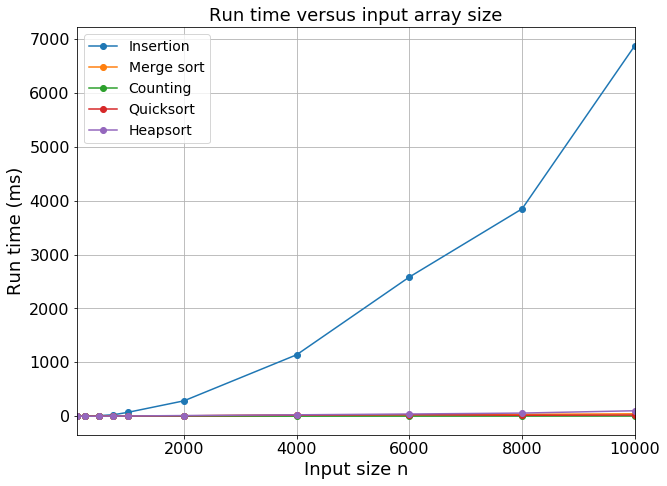

In [22]:
# Plot the data.
# First set up some defaults.
plt.rcParams['figure.figsize'] = (10.0, 7.5)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14


df.plot(x="Size", y=["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"], kind="line", marker="o", grid=True)
plt.title('Run time versus input array size', fontsize='18')
plt.xlabel("Input size n")
plt.ylabel("Run time (ms)")
#plt.savefig("images/TimeVsSize1.png")

Clearly, insertion sort is way slower than the other four algorithms, so we'll zoom in on the y axis to examine them in more detail. Insert sort looks to be increasing quadratically with input size, which is what we expect for average-case behavior.

Text(0, 0.5, 'Run time (ms)')

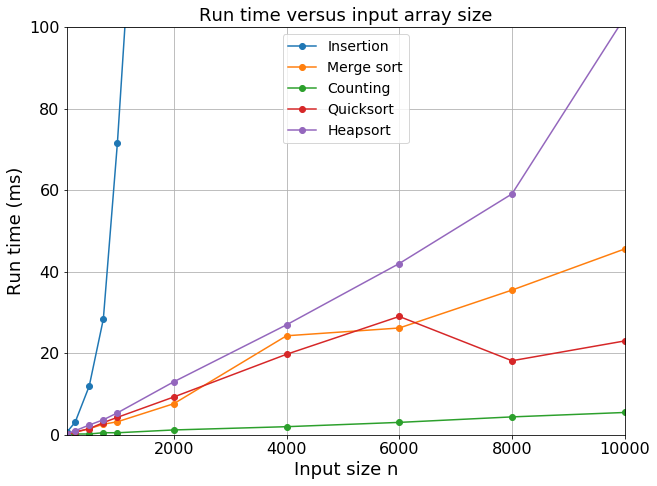

In [23]:
df.plot(x="Size", y=["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"], kind="line", marker="o", grid=True)
plt.title('Run time versus input array size', fontsize='18')
plt.ylim(0, 100)
plt.xlabel("Input size n")
plt.ylabel("Run time (ms)")
#plt.savefig("images/TimeVsSize2.png")

## Fit some of the data to what we expect
***

### Insertion sort - linear regression

We expect quadratic dependence of run time on input size.

In [24]:
# Do simple linear regression using polyfit
# y = p0*x^2 + p1*x + p2
# x = Size
# Y = runtimes
fit = np.polyfit(df['Size'], df['Insertion'], 2)
print(fit)
p0, p1, p2 = fit[0], fit[1], fit[2]
print("Polyfit: p0 = %8.6f, p1 = %6.6f.,  p2 = %6.6f." % (p0, p1, p2))
# correlation coefficient
print("R squared:", round(np.corrcoef(df['Size'], df['Insertion'])[0][1] ** 2, 3))

[ 6.78796106e-05 -1.15341146e-02  1.61987620e+01]
Polyfit: p0 = 0.000068, p1 = -0.011534.,  p2 = 16.198762.
R squared: 0.929


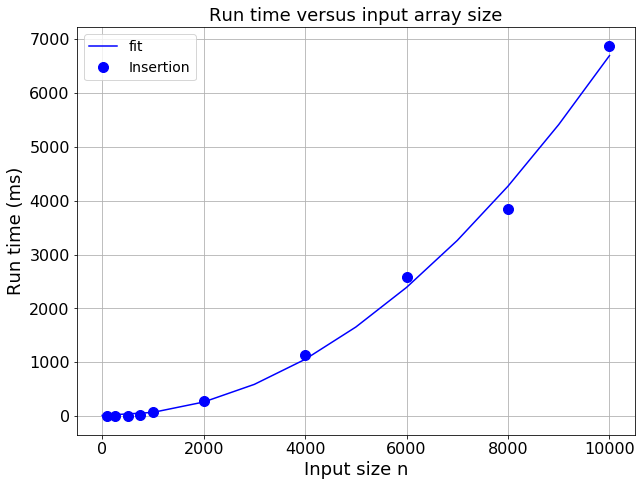

In [25]:
# Plot fitted line with the data.
x = np.arange(0, 11000, 1000)
plt.plot(x, p0 * x * x + p1 * x + p2, 'b-', label="fit")
plt.plot(df['Size'], df['Insertion'], '.b', markersize=20, label="Insertion")

plt.title('Run time versus input array size', fontsize='18')
plt.xlabel("Input size n")
plt.ylabel("Run time (ms)")
plt.legend()
plt.grid()
#plt.savefig("images/InsertionFit.png")

### Merge sort - linear regression

We expect n log(n) dependence of run time on input size.

In [26]:
# Do simple linear regression using polyfit
# y = p0*x + p1 
# where x = n log(n)
# y = runtimes

fit = np.polyfit(df['Size'] * np.log2(df['Size']), df['Merge sort'], 1)
print(fit)
p0, p1 = fit[0], fit[1]
print("Polyfit: p0 = %8.6f, p1 = %6.6f." % (p0, p1))
# correlation coefficient
print("R squared:", round(np.corrcoef(df['Size'] * np.log2(df['Size']), df['Merge sort'])[0][1] ** 2, 3))

[3.46449831e-04 6.62148287e-01]
Polyfit: p0 = 0.000346, p1 = 0.662148.
R squared: 0.978


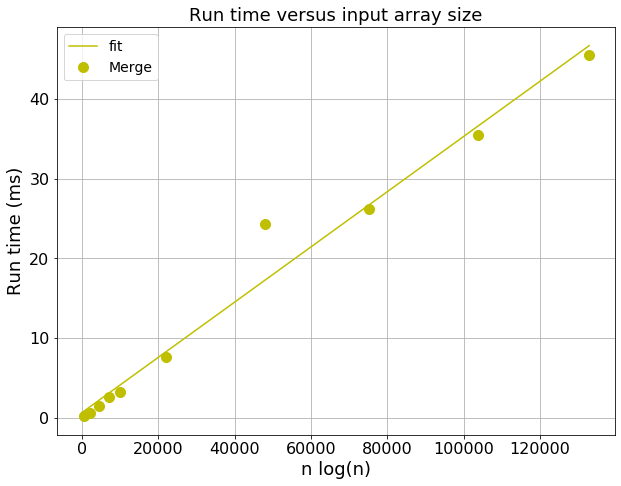

In [27]:
# Plot fitted line with the data.
x = np.arange(1, 11000, 1000)
xmod = x * np.log2(x)
plt.plot(xmod, p0 * xmod + p1, 'y-', label="fit")
#plt.plot(x, 0.001 * x * np.log2(x), 'y-')
plt.plot(df['Size'] * np.log2(df['Size']), df['Merge sort'], '.y', markersize=20, label="Merge")

plt.title('Run time versus input array size', fontsize='18')
plt.xlabel("n log(n)")
plt.ylabel("Run time (ms)")
plt.legend()
plt.grid()
#plt.savefig("images/MergeFit.png")

### Counting sort - linear regression

We expect linear dependence of run time on input size.

In [28]:
# Do simple linear regression using polyfit
# y = p0*x + p1
# x = Size
# Y = runtimes
fit = np.polyfit(df['Size'], df['Counting'], 1)
print(fit)
p0, p1 = fit[0], fit[1]
print("Polyfit: p0 = %8.6f, p1 = %6.6f." % (p0, p1))
# correlation coefficient
print("R squared:", round(np.corrcoef(df['Size'], df['Counting'])[0][1] ** 2, 3))

[ 0.00054034 -0.01159237]
Polyfit: p0 = 0.000540, p1 = -0.011592.
R squared: 0.997


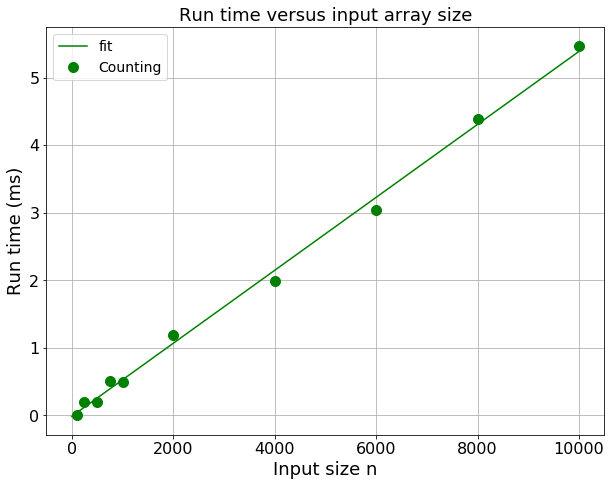

In [29]:
# Plot fitted line with the data.
x = np.arange(0, 11000, 1000)
plt.plot(x, p0 * x + p1, 'g-', label="fit")
plt.plot(df['Size'], df['Counting'], '.g', markersize=20, label="Counting")

plt.title('Run time versus input array size', fontsize='18')
plt.xlabel("Input size n")
plt.ylabel("Run time (ms)")
plt.legend()
plt.grid()
#plt.savefig("images/CountingFit.png")

### Quicksort - linear regression

We expect linear dependence of run time on n log(n).

In [30]:
# Do simple linear regression using polyfit
# y = p0*x + p1
# x = Size
# Y = runtimes
fit = np.polyfit(df['Size'] * np.log2(df['Size']), df['Quicksort'], 1)
print(fit)
p0, p1 = fit[0], fit[1]
print("Polyfit: p0 = %8.6f, p1 = %6.6f." % (p0, p1))
# correlation coefficient
print("R squared:", round(np.corrcoef(df['Size'] * np.log2(df['Size']), df['Quicksort'])[0][1] ** 2, 3))

[1.91357389e-04 3.11279930e+00]
Polyfit: p0 = 0.000191, p1 = 3.112799.
R squared: 0.734


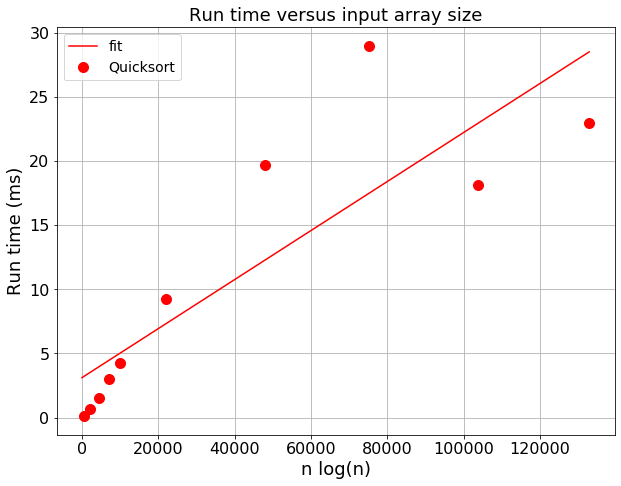

In [31]:
# Plot fitted line with the data.
x = np.arange(1, 11000, 1000)
xmod = x * np.log2(x)
plt.plot(xmod, p0 * xmod + p1, 'r-', label="fit")
#plt.plot(x, 0.001 * x * np.log2(x), 'y-')
plt.plot(df['Size'] * np.log2(df['Size']), df['Quicksort'], '.r', markersize=20, label="Quicksort")

plt.title('Run time versus input array size', fontsize='18')
plt.xlabel("n log(n)")
plt.ylabel("Run time (ms)")
plt.legend()
plt.grid()
#plt.savefig("images/QuickFit.png")

### Heapsort - linear regression

We expect linear dependence of run time on n log(n).

In [32]:
# Do simple linear regression using polyfit
# y = p0*x + p1
# x = Size
# Y = runtimes
fit = np.polyfit(df['Size'] * np.log2(df['Size']), df['Heapsort'], 1)
print(fit)
p0, p1 = fit[0], fit[1]
print("Polyfit: p0 = %8.6f, p1 = %6.6f." % (p0, p1))
# correlation coefficient
print("R squared:", round(np.corrcoef(df['Size'] * np.log2(df['Size']), df['Heapsort'])[0][1] ** 2, 3))

[ 6.89170394e-04 -2.35658456e+00]
Polyfit: p0 = 0.000689, p1 = -2.356585.
R squared: 0.965


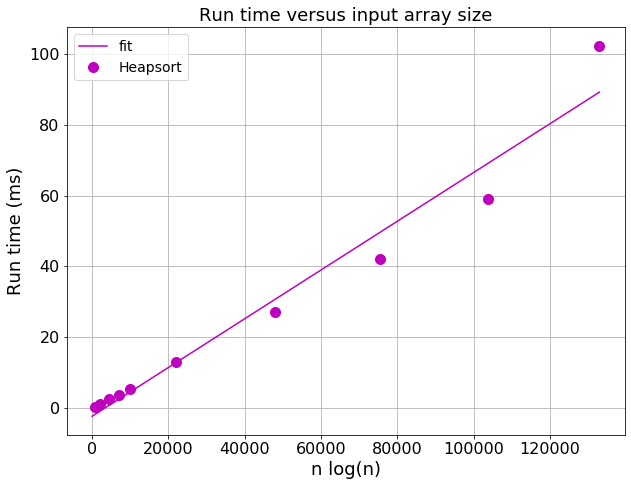

In [33]:
# Plot fitted line with the data.
x = np.arange(1, 11000, 1000)
xmod = x * np.log2(x)
plt.plot(xmod, p0 * xmod + p1, 'm-', label="fit")
#plt.plot(x, 0.001 * x * np.log2(x), 'y-')
plt.plot(df['Size'] * np.log2(df['Size']), df['Heapsort'], '.m', markersize=20, label="Heapsort")

plt.title('Run time versus input array size', fontsize='18')
plt.xlabel("n log(n)")
plt.ylabel("Run time (ms)")
plt.legend()
plt.grid()
#plt.savefig("images/HeapFit.png")

## How do the algorithms perform with an already-sorted array?
***

In [34]:
# Intialise a Pandas dataframe to hold results. 
# New set of n values
n_set = [100, 500, 1000, 1500, 2000]
data = {'Size':n_set} 
  
# Create DataFrame 
df2 = pd.DataFrame(data)
df2 # Check ok

,Size
0,100
1,500
2,1000
3,1500
4,2000


In [35]:
runs = 10
print("Size", "\t\t", end='')
for j in n_set:
    print(j, "\t\t", end='')
print('\n')

# Array to hold algorithm name.
alg_name = ["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"]
# Array to hold function names.
algs = [insertion_sort, merge_sort, counting_sort, quick_sort, heap_sort]

# Iterate through sort algorithms and their names at same time with zip.
for c, alg in zip(alg_name, algs):
    # print(c, alg) # Check names match algorithm being called.
    print(c, "\t", end='')
    each_alg = []
    
    # Iterate through the input arrays of differenet size.
    for i in n_set:
        # print("Size", i) # Check
    
        # Initialize runtimes to zero
        runtimes = []
    
        # Run each sort algorithm 10 times.
        for r in range(runs):
            # Re-set the input so that its unsorted before each run.
            ip = random_array(i)
            # print("Size=", i, "run=", r, "IP=", ip) # Check ok
            # Sort it to simulate best case scenario
            ip_order = counting_sort(ip)
            # print("Size=", i, "run=", r, "best=", ip_order) # Check ok
            
            # Call each sorting algorithm in turn. 
            ######################################################################
            # Need to pass 3 args to quick_sort, only 1 to the others.
            if alg == quick_sort:
                # print("3 pars required")
                # Start time
                ts = time.time()
                alg(ip_order, 0, len(ip_order)-1)
                # Finish time
                tf = time.time()
                # print("Size=", i,"run=", r, "OP=", alg(ip_order, 0, len(ip_order)-1)) # Check ok
            else:
                # print("1 par required")
                # Start time
                ts = time.time()
                alg(ip_order)
                # Finish time
                tf = time.time()
                # print("Size=", i,"run=", r, "OP=", alg(ip_order)) # Check ok
            ######################################################################

            # Calculate difference between finish and start times
            time_taken = tf - ts
        
            # Place time taken on each run into runtimes array 
            runtimes.append(time_taken)
            
        # Average of 10 runs.
        avg_runtime = (np.average(runtimes)) * 1000
        print("%.3f" % avg_runtime, "\t\t", end='')
        
        # List of avg_runtimes for each size for a single algorithm.
        each_alg.append(avg_runtime)
        
    #print(each_alg) # Check ok
    
    # Store algorithm name and avg runtimes for each size in a list.
    times_all_n = {c: each_alg}
    # print(times_all_n) # Check it matches what's printed to console ok
    
    # Make a new dataframe df2 out of the list.
    dfnew2 = pd.DataFrame(times_all_n)
    # Append it to existing results.
    df2 = pd.concat([df2, dfnew2], axis=1)
    
    print('\n')

Size 		100 		500 		1000 		1500 		2000 		

Insertion 	0.000 		0.000 		0.299 		0.399 		0.199 		

Merge sort 	0.299 		1.496 		3.496 		4.691 		6.537 		

Counting 	0.000 		0.199 		0.606 		0.699 		1.097 		

Quicksort 	0.601 		18.210 		72.701 		275.976 		325.907 		

Heapsort 	0.895 		5.578 		16.008 		16.655 		12.666 		



## Display the results for an already-sorted array

In [36]:
# df holds results of average runtimes for each algorithm and for each size n.
print(df2.round(3))
# Write this dataframe to a file.
#df2.to_csv("benchmark_results_sorted.csv", index=False, header=True)

   Size  Insertion  Merge sort  Counting  Quicksort  Heapsort
0   100      0.000       0.299     0.000      0.601     0.895
1   500      0.000       1.496     0.199     18.210     5.578
2  1000      0.299       3.496     0.606     72.701    16.008
3  1500      0.399       4.691     0.699    275.976    16.655
4  2000      0.199       6.537     1.097    325.907    12.666


## Plot the results for an already-sorted array
Note that quicksort ran into trouble with maximum recursion depth for n greater than 2000.

In [37]:
df2

,Size,Insertion,Merge sort,Counting,Quicksort,Heapsort
0,100,0.000000,0.299120,0.000000,0.601220,0.894618
1,500,0.000000,1.495528,0.198793,18.209982,5.578041
2,1000,0.299144,3.495598,0.606108,72.701478,16.007924
3,1500,0.399017,4.690909,0.698709,275.975585,16.654992
4,2000,0.199413,6.536603,1.097155,325.907063,12.666011


(0, 40)

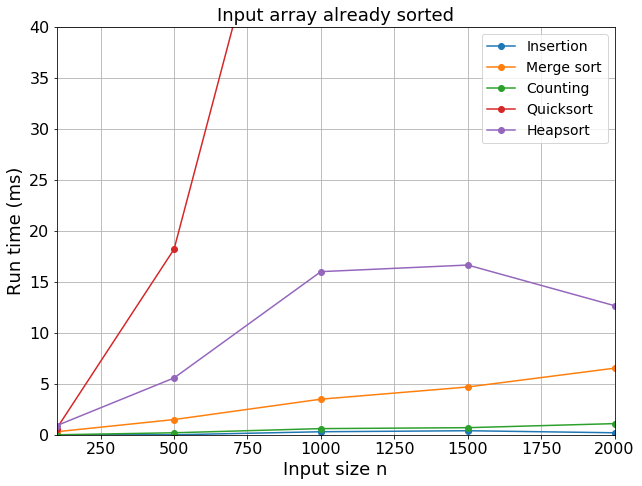

In [38]:
df2.plot(x="Size", y=["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"], kind="line", marker="o", grid=True)
plt.title('Input array already sorted', fontsize='18')
plt.xlabel("Input size n")
plt.ylabel("Run time (ms)")
plt.ylim(0, 40)
#plt.savefig("images/TimeVsSize_sorted.png")

## What about an array that is in complete reverse order?
***
use L.reverse() to reverse a list L in-place

In [39]:
# Intialise a Pandas dataframe df3 to hold results. 
# n_set = [10]
n_set = [100, 500, 1000, 1500, 2000]
data = {'Size':n_set} 
  
# Create DataFrame 
df3 = pd.DataFrame(data)
df3 # Check ok

,Size
0,100
1,500
2,1000
3,1500
4,2000


In [40]:
runs = 10
print("Size", "\t\t", end='')
for j in n_set:
    print(j, "\t\t", end='')
print('\n')

# Array to hold algorithm name.
alg_name = ["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"]
# Array to hold function names.
algs = [insertion_sort, merge_sort, counting_sort, quick_sort, heap_sort]

# Iterate through sort algorithms and their names at same time with zip.
for c, alg in zip(alg_name, algs):
    # print(c, alg) # Check names match algorithm being called.
    print(c, "\t", end='')
    each_alg = []
    
    # Iterate through the input arrays of differenet size.
    for i in n_set:
        # print("Size", i) # Check
    
        # Initialize runtimes to zero
        runtimes = []
    
        # Run each sort algorithm 10 times.
        for r in range(runs):
            # Re-set the input so that its unsorted before each run.
            ip = random_array(i)
            # print("Size=", i, "run=", r, "IP=", ip) # Check ok
            # Sort it 
            ip_order = counting_sort(ip)
            # print("Size=", i, "run=", r, "best=", ip_order) # Check ok
            # and reverse the order to simulate worst case scenario IN-PLACE !!
            ip_order.reverse()
            # print("Size=", i, "run=", r, "worst=", ip_order) # Check ok
            
            # Call each sorting algorithm in turn. 
            ######################################################################
            # Need to pass 3 args to quick_sort, only 1 to the others.
            if alg == quick_sort:
                # print("3 pars required")
                # Start time
                ts = time.time()
                alg(ip_order, 0, len(ip_order)-1)
                # Finish time
                tf = time.time()
                # print("Size=", i,"run=", r, "OP=", alg(ip_order, 0, len(ip_order)-1)) # Check ok
            else:
                # print("1 par required")
                # Start time
                ts = time.time()
                alg(ip_order)
                # Finish time
                tf = time.time()
                # print("Size=", i,"run=", r, "OP=", alg(ip_order)) # Check ok
            ######################################################################

            # Calculate difference between finish and start times
            time_taken = tf - ts
        
            # Place time taken on each run into runtimes array 
            runtimes.append(time_taken)
            
        # Average of 10 runs.
        avg_runtime = (np.average(runtimes)) * 1000
        print("%.3f" % avg_runtime, "\t\t", end='')
        
        # List of avg_runtimes for each size for a single algorithm.
        each_alg.append(avg_runtime)
        
    #print(each_alg) # Check ok
    
    # Store algorithm name and avg runtimes for each size in a list.
    times_all_n = {c: each_alg}
    # print(times_all_n) # Check it matches what's printed to console ok
    
    # Make a new dataframe out of the list.
    dfnew3 = pd.DataFrame(times_all_n)
    # Append it to existing results.
    df3 = pd.concat([df3, dfnew3], axis=1)
    
    print('\n')

Size 		100 		500 		1000 		1500 		2000 		

Insertion 	1.197 		24.835 		96.110 		332.076 		455.102 		

Merge sort 	0.200 		1.490 		2.889 		5.186 		6.826 		

Counting 	0.000 		0.299 		0.497 		0.904 		1.106 		

Quicksort 	0.499 		9.765 		35.651 		118.663 		219.734 		

Heapsort 	0.299 		2.194 		4.904 		8.378 		11.061 		



## Display the results for a reversed array

In [41]:
# df holds results of average runtimes for each algorithm and for each size n.
print(df3.round(3))
# Write this dataframe to a file.
# df3.to_csv("benchmark_results_reversed.csv", index=False, header=True)

   Size  Insertion  Merge sort  Counting  Quicksort  Heapsort
0   100      1.197       0.200     0.000      0.499     0.299
1   500     24.835       1.490     0.299      9.765     2.194
2  1000     96.110       2.889     0.497     35.651     4.904
3  1500    332.076       5.186     0.904    118.663     8.378
4  2000    455.102       6.826     1.106    219.734    11.061


## Plot the results for a reversed array

In [42]:
df3

,Size,Insertion,Merge sort,Counting,Quicksort,Heapsort
0,100,1.196814,0.200295,0.000000,0.498748,0.299311
1,500,24.834895,1.489544,0.299168,9.764647,2.193570
2,1000,96.109653,2.889180,0.497031,35.650587,4.903889
3,1500,332.076406,5.186057,0.903797,118.662953,8.377624
4,2000,455.102444,6.826067,1.106453,219.733620,11.060858


(0, 400)

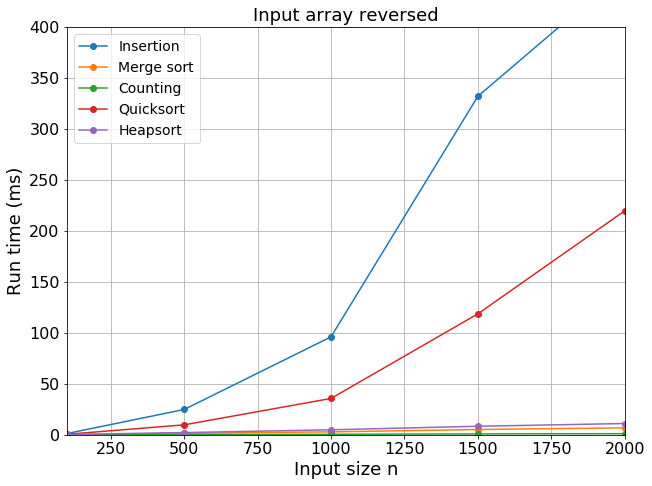

In [43]:
df3.plot(x="Size", y=["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"], kind="line", marker="o", grid=True)
plt.title('Input array reversed', fontsize='18')
plt.xlabel("Input size n")
plt.ylabel("Run time (ms)")
plt.ylim(0, 400)
# plt.savefig("images/TimeVsSize_reversed.png")

## Finally, re-do a random input over same set of input sizes for direct comparison

In [44]:
# Intialise a Pandas dataframe df4 to hold results. 
# n_set = [10]
n_set = [100, 500, 1000, 1500, 2000]
data = {'Size':n_set} 
  
# Create DataFrame 
df4 = pd.DataFrame(data)
df4 # Check ok

,Size
0,100
1,500
2,1000
3,1500
4,2000


In [45]:
runs = 10
print("Size", "\t\t", end='')
for j in n_set:
    print(j, "\t\t", end='')
print('\n')

# Array to hold algorithm name.
alg_name = ["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"]
# Array to hold function names.
algs = [insertion_sort, merge_sort, counting_sort, quick_sort, heap_sort]

# Iterate through sort algorithms and their names at same time with zip.
for c, alg in zip(alg_name, algs):
    # print(c, alg) # Check names match algorithm being called.
    print(c, "\t", end='')
    each_alg = []
    
    # Iterate through the input arrays of differenet size.
    for i in n_set:
        # print("Size", i) # Check
    
        # Initialize runtimes to zero
        runtimes = []
    
        # Run each sort algorithm 10 times.
        for r in range(runs):
            # Re-set the input so that its unsorted before each run.
            ip = random_array(i)
            # print("Size=", i, "run=", r, "IP=", ip) # Check ok
            
            # Call each sorting algorithm in turn. 
            ######################################################################
            # Need to pass 3 args to quick_sort, only 1 to the others.
            if alg == quick_sort:
                # print("3 pars required")
                # Start time
                ts = time.time()
                alg(ip, 0, len(ip)-1)
                # Finish time
                tf = time.time()
                # print("Size=", i,"run=", r, "OP=", alg(ip_order, 0, len(ip_order)-1)) # Check ok
            else:
                # print("1 par required")
                # Start time
                ts = time.time()
                alg(ip)
                # Finish time
                tf = time.time()
                # print("Size=", i,"run=", r, "OP=", alg(ip_order)) # Check ok
            ######################################################################

            # Calculate difference between finish and start times
            time_taken = tf - ts
        
            # Place time taken on each run into runtimes array 
            runtimes.append(time_taken)
            
        # Average of 10 runs.
        avg_runtime = (np.average(runtimes)) * 1000
        print("%.3f" % avg_runtime, "\t\t", end='')
        
        # List of avg_runtimes for each size for a single algorithm.
        each_alg.append(avg_runtime)
        
    #print(each_alg) # Check ok
    
    # Store algorithm name and avg runtimes for each size in a list.
    times_all_n = {c: each_alg}
    # print(times_all_n) # Check it matches what's printed to console ok
    
    # Make a new dataframe out of the list.
    dfnew4 = pd.DataFrame(times_all_n)
    # Append it to existing results.
    df4 = pd.concat([df4, dfnew4], axis=1)
    
    print('\n')

Size 		100 		500 		1000 		1500 		2000 		

Insertion 	0.602 		12.268 		50.547 		164.642 		209.915 		

Merge sort 	0.301 		3.193 		7.980 		13.458 		17.783 		

Counting 	0.399 		0.498 		1.198 		1.990 		2.144 		

Quicksort 	0.299 		1.801 		4.685 		6.580 		6.375 		

Heapsort 	0.295 		2.393 		5.288 		8.873 		12.257 		



In [46]:
# df holds results of average runtimes for each algorithm and for each size n.
print(df4.round(3))
# Write this dataframe to a file.
# df4.to_csv("benchmark_results_random.csv", index=False, header=True)

   Size  Insertion  Merge sort  Counting  Quicksort  Heapsort
0   100      0.602       0.301     0.399      0.299     0.295
1   500     12.268       3.193     0.498      1.801     2.393
2  1000     50.547       7.980     1.198      4.685     5.288
3  1500    164.642      13.458     1.990      6.580     8.873
4  2000    209.915      17.783     2.144      6.375    12.257


## Plot the results for random input

In [47]:
df4

,Size,Insertion,Merge sort,Counting,Quicksort,Heapsort
0,100,0.601697,0.301099,0.398898,0.299048,0.295186
1,500,12.267828,3.192782,0.498438,1.800871,2.392626
2,1000,50.547457,7.979703,1.197600,4.685426,5.288267
3,1500,164.642191,13.457561,1.990032,6.579709,8.872533
4,2000,209.914899,17.783117,2.143812,6.375098,12.256885


(0, 40)

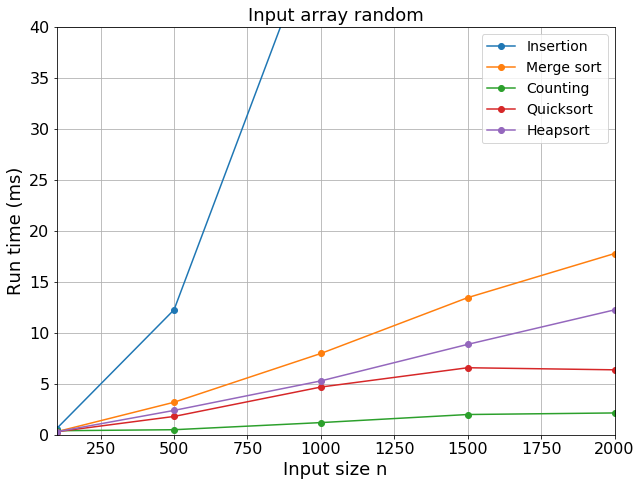

In [48]:
df4.plot(x="Size", y=["Insertion", "Merge sort", "Counting", "Quicksort", "Heapsort"], kind="line", marker="o", grid=True)
plt.title('Input array random', fontsize='18')
plt.xlabel("Input size n")
plt.ylabel("Run time (ms)")
plt.ylim(0, 40)
#plt.savefig("images/TimeVsSize_random.png")

## The end